# Step #1 Load the Data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


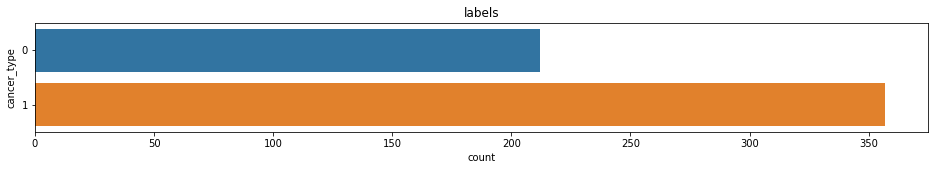

In [19]:
# A tutorial for this file is available at www.relataly.com

import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_predict
from sklearn import datasets
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

df = datasets.load_breast_cancer(as_frame=True)

df_dia = df.data
df_dia['cancer_type'] = df.target

plt.figure(figsize=(16,2))
plt.title(f'labels: 0=maligant, 1=benign')
fig = sns.countplot(y="cancer_type", data=df_dia)

df_dia.head()

# Step #2 Data Preparation and Model Training

In [20]:
# Separate labels from training data
# X = df_dia[['mean symmetry', 'mean area']] #Training data
X = df_dia.drop('cancer_type', axis=1) #Training data
y = df_dia['cancer_type'] #Prediction label

# Split the data into x_train and y_train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [21]:
# Create the Random Forest Classifier
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6, class_weight='balanced')
ranfor = dfrst.fit(X_train, y_train)
y_pred = ranfor.predict(X_test)

# Step #3 Confusion Matrix and Metrics

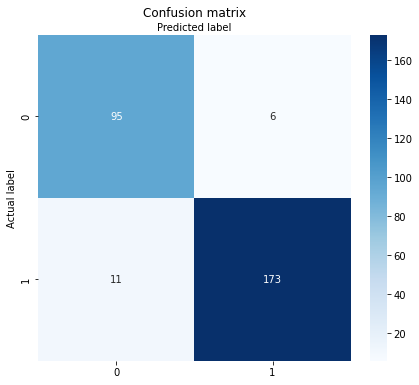

In [22]:
# Create heatmap from the confusion matrix
def createConfMatrix(class_names, matrix):
    class_names=[0, 1] 
    tick_marks = [0.5, 1.5]
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label'); plt.xlabel('Predicted label')
    plt.yticks(tick_marks, class_names); plt.xticks(tick_marks, class_names)
    
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
createConfMatrix(matrix=cnf_matrix, class_names=[0, 1])

In [23]:
# Calculate Standard Error Metrics
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))

# Classification Report (Alternative)
results_log = classification_report(y_test, y_pred, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

accuracy: 0.94
precision: 0.97
recall: 0.94
f1_score: 0.95
              precision    recall  f1-score     support
0              0.896226  0.940594  0.917874  101.000000
1              0.966480  0.940217  0.953168  184.000000
accuracy       0.940351  0.940351  0.940351    0.940351
macro avg      0.931353  0.940406  0.935521  285.000000
weighted avg   0.941583  0.940351  0.940660  285.000000


# Step #4 ROC Curve

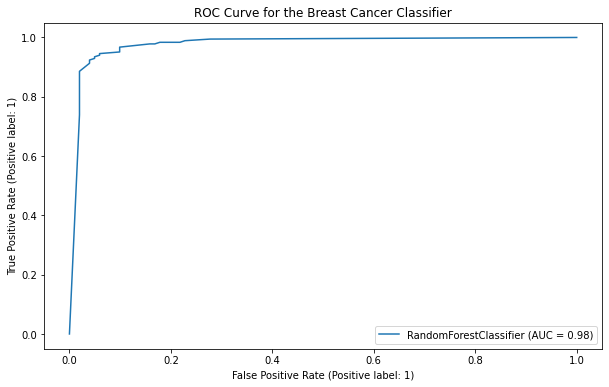

In [24]:
# Compute ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
RocCurveDisplay.from_estimator(ranfor, X_test, y_test, ax=ax)
plt.title('ROC Curve for the Breast Cancer Classifier')
plt.show()

In [25]:
# Calculate probability scores 
y_scores = cross_val_predict(ranfor, X_test, y_test, cv=3, method='predict_proba')
# Because of the structure of how the model returns the y_scores, we need to convert them into binary values
y_scores_binary = [1 if x[0] < 0.5 else 0 for x in y_scores]

# Now, we can calculate the area under the ROC curve
auc = roc_auc_score(y_test, y_scores_binary, average="macro")
auc # Be aware that due to the random nature of cross validation, the results will change when you run the code

0.9035191562634525